In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
len(df)

1338

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
df.charges = np.log1p(df.charges)

<AxesSubplot:xlabel='charges', ylabel='Count'>

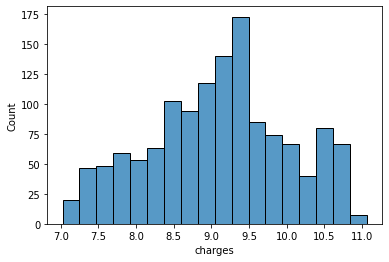

In [64]:
sns.histplot(df.charges)

In [65]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [66]:
n_train = int(len(df)*0.8)

In [67]:
n_train

1070

In [68]:
n_test = len(df) - n_train
n_test


268

In [69]:
idx = np.arange(len(df))
np.random.seed(7)
np.random.shuffle(idx)

In [70]:
categorical = list(df.dtypes[df.dtypes == object].index)
numerical = list(df.dtypes[df.dtypes != object].index)
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:]]
y_train = df_train.charges.values
y_test = df_test.charges.values
del df_train['charges']
del df_test['charges']
numerical.remove('charges')

In [71]:
df_train.reset_index(drop=True)
df_test.reset_index(drop=True)

,age,sex,bmi,children,smoker,region
0,52,female,38.380,2,no,northeast
1,51,male,33.330,3,no,southeast
2,26,male,17.670,0,no,northwest
3,50,female,23.540,2,no,southeast
4,34,female,27.720,0,no,southeast
...,...,...,...,...,...,...
263,40,male,30.875,4,no,northwest
264,51,male,23.210,1,yes,southeast
265,46,female,30.200,2,no,southwest
266,30,female,21.945,1,no,northeast


In [72]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
def test(df_train, y_train, df_test, y_test):
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(df_train.to_dict(orient='records'))
    X_test = dv.transform(df_test.to_dict(orient='records'))
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(mse(y_pred, y_test, squared=False))
    print(mse(np.expm1(y_pred), np.expm1(y_test), squared=False))
    

In [73]:
test(df_train[numerical + categorical],y_train,df_test[numerical + categorical],y_test)

0.4462277776797191
9355.5761882394
